In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import time
time_start = time.time()

sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

# 1. Lectura de la base de datos

In [9]:
#path = '/Users/diana/Library/Mobile Documents/com~apple~CloudDocs/Maestria/Aprendizaje Automático/HR_attrition_orig_proc.csv'
path = 'databinarystudents.csv'
data = pd.read_csv(path, sep = ',', na_filter = False)
data = data.iloc[:, 1:]

In [10]:
data.shape

(150, 33)

In [11]:
# Columnas del dataframe
data.dtypes

yL       int64
x1     float64
x2     float64
x3       int64
x4       int64
x5       int64
x6       int64
x7       int64
x8     float64
x9       int64
x10    float64
x11    float64
x12    float64
x13      int64
x14      int64
x15      int64
x16      int64
x17      int64
x18      int64
x19      int64
x20      int64
x21    float64
x22    float64
x23    float64
x24    float64
x25      int64
x26      int64
x27    float64
x28      int64
x29      int64
x30      int64
x31    float64
x32    float64
dtype: object

In [12]:
data.head()

,yL,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32
0,1,49.856,118.8,1,0,0,0,0,16.32096,0,...,0.9709,0.0003,6,6,24.7138,0,0,7,0.056546,0.112860
1,1,71.836,34.8,0,0,0,0,1,15.00535,44,...,0.4200,0.0000,8,4,38.0658,0,0,7,0.655260,0.886908
2,1,66.725,41.8,0,1,0,0,0,17.07023,27,...,0.9650,0.0000,6,6,48.3807,0,1,4,0.067855,0.133944
3,0,41.696,132.0,0,0,1,0,0,16.31460,0,...,0.0091,0.0001,6,4,59.8410,0,0,7,0.133230,0.260102
4,1,71.351,24.2,1,0,0,0,0,11.10790,31,...,0.0051,0.0000,5,7,175.9250,0,0,3,0.318584,0.627729


# 2. Análisis Exploratorio

In [13]:
data.describe()

,yL,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.666667,64.315059,50.366667,0.300000,0.146667,0.040000,0.12000,0.100000,15.403789,27.593333,...,0.239536,0.032573,6.380000,5.586667,78.493669,0.133333,0.053333,3.926667,0.283136,0.491055
std,0.472984,10.050340,41.298169,0.459793,0.354958,0.196616,0.32605,0.301005,1.929863,15.434684,...,0.350769,0.134419,0.924462,0.963680,47.992359,0.341073,0.225450,2.186280,0.193801,0.299361
min,0.000000,34.217000,4.600000,0.000000,0.000000,0.000000,0.00000,0.000000,10.617270,0.000000,...,0.000000,0.000000,4.000000,3.000000,11.087400,0.000000,0.000000,1.000000,0.011540,0.023037
25%,0.000000,56.866750,14.725000,0.000000,0.000000,0.000000,0.00000,0.000000,14.507013,25.500000,...,0.001625,0.000000,6.000000,5.000000,44.936225,0.000000,0.000000,2.000000,0.100434,0.194432
50%,1.000000,67.754500,40.000000,0.000000,0.000000,0.000000,0.00000,0.000000,15.463720,31.000000,...,0.021850,0.000100,6.000000,6.000000,66.404000,0.000000,0.000000,4.000000,0.247636,0.461095
75%,1.000000,71.519725,81.400000,1.000000,0.000000,0.000000,0.00000,0.000000,16.586320,39.750000,...,0.415925,0.001500,7.000000,6.000000,102.720000,0.000000,0.000000,6.000000,0.436986,0.797946
max,1.000000,78.836829,173.700000,1.000000,1.000000,1.000000,1.00000,1.000000,20.850060,45.000000,...,0.994200,0.846600,9.000000,7.000000,344.830000,1.000000,1.000000,7.000000,0.662330,0.996328


In [14]:
# identificación de valores faltantes
#pd.isnull(data).values.ravel().sum()
[col for col in data.columns if data[col].isnull().sum() > 0]

[]

In [15]:
# Identificando los niveles o valores de las variables categóticas
for i in range(1,33,1):
    data_level= data['x'+str(i)].unique().tolist()
    if len(data_level) < 5:
        print('x'+str(i), data_level)
    else:
        print('x'+str(i)+': numerica')

x1: numerica
x2: numerica
x3 [1, 0]
x4 [0, 1]
x5 [0, 1]
x6 [0, 1]
x7 [0, 1]
x8: numerica
x9: numerica
x10: numerica
x11: numerica
x12: numerica
x13 [0, 1]
x14 [1, 0]
x15 [0, 1]
x16 [1, 0]
x17 [0, 1]
x18 [0, 1]
x19 [0, 1]
x20 [0, 1]
x21: numerica
x22: numerica
x23: numerica
x24: numerica
x25: numerica
x26: numerica
x27: numerica
x28 [0, 1]
x29 [0, 1]
x30: numerica
x31: numerica
x32: numerica


### Análisis de la variable respuesta

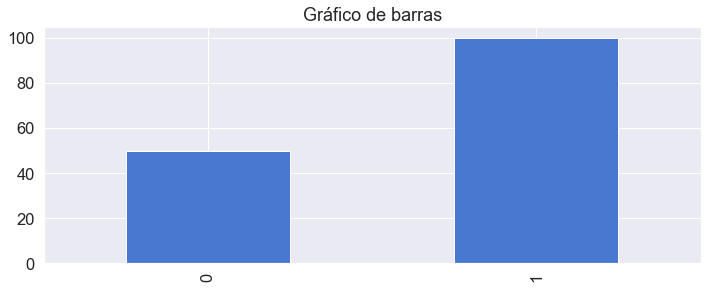

In [19]:
# Gráfico para variable respuesta

fig = plt.figure(figsize=(40,20))

# plt.subplot2grid((4,3),(0,0))
# plot = data['yL'].value_counts().plot(kind='pie', autopct='%.2f', 
#                                             figsize=(20, 20),
#                                             title='Variable Respuesta')

plt.subplot2grid((4,3),(0,1))
plot = data['yL'].value_counts(sort = False).plot(kind='bar', title='Gráfico de barras')

### Análisis de variables numéricas

In [20]:
numeric_variables =['yL','x1','x2','x8','x9','x10','x11','x12','x21','x22','x23','x24','x25','x26','x27','x30','x31','x32']
subset = data[numeric_variables]

In [21]:
# Comparación de medias con respecto a la variable respuesta
subset.groupby('yL').mean()

,x1,x2,x8,x9,x10,x11,x12,x21,x22,x23,x24,x25,x26,x27,x30,x31,x32
yL,,,,,,,,,,,,,,,,,
0,58.946025,71.168,15.359452,25.60,71.568599,7.165334,9.528238,0.561194,0.000968,0.187466,0.061034,6.34,5.76,68.680112,4.48,0.315417,0.529517
1,66.999576,39.966,15.425958,28.59,173.550853,8.122997,6.897811,0.556439,0.008827,0.265571,0.018342,6.40,5.50,83.400447,3.65,0.266995,0.471824


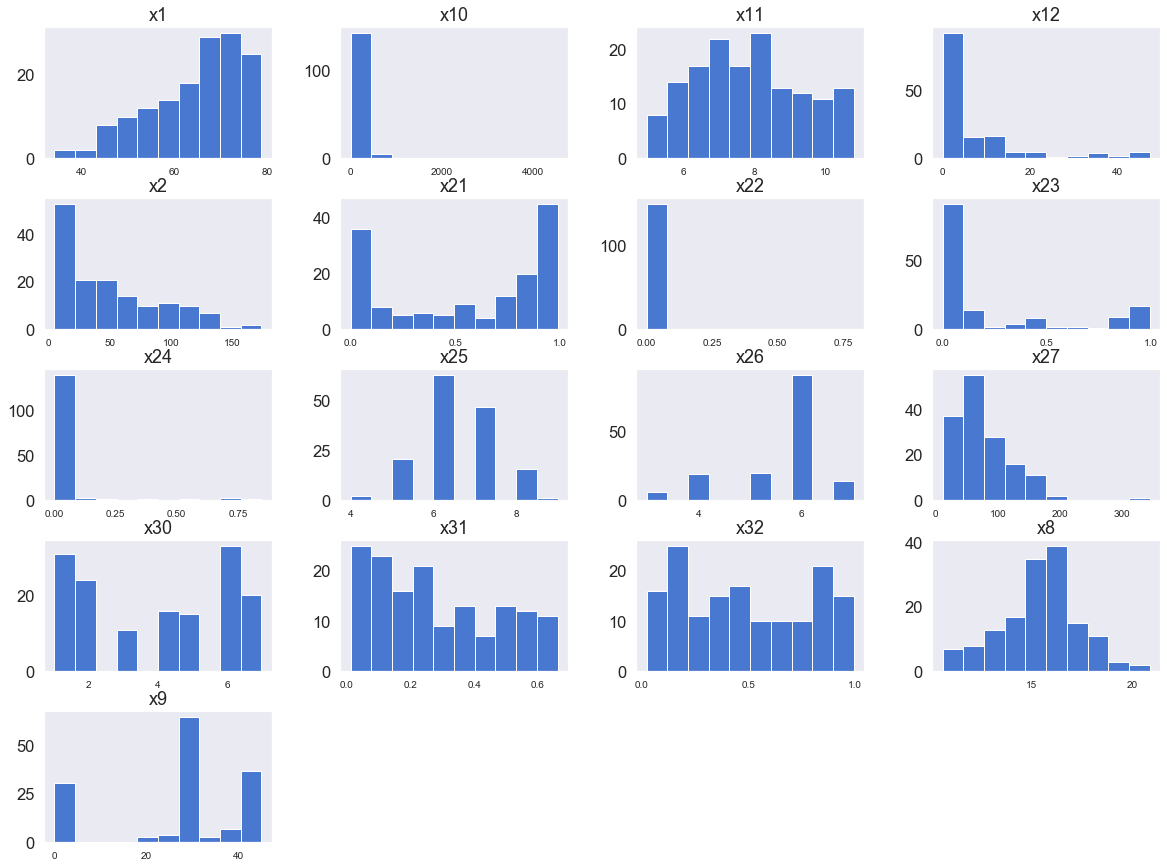

In [22]:
# Histograma de las variables numéricas
histograma = subset.iloc[:, 1:].hist(grid=False, xlabelsize=10, figsize=(20,15))

In [23]:
#Matriz de correlación entre variables numéricas
corr = subset.iloc[:, 1:].corr()
corr.style.background_gradient(cmap='coolwarm')

,x1,x2,x8,x9,x10,x11,x12,x21,x22,x23,x24,x25,x26,x27,x30,x31,x32
x1,1,-0.940529,-0.0639853,0.436674,0.161794,0.833516,-0.224884,0.304594,0.11103,-0.263264,-0.0269637,0.050935,-0.142148,0.319646,-0.594034,-0.209468,-0.166435
x2,-0.940529,1,0.13623,-0.412758,-0.154685,-0.824143,0.248708,-0.369373,-0.0910592,0.326424,0.0255886,-0.0574657,0.0904113,-0.348221,0.599938,0.207881,0.153509
x8,-0.0639853,0.13623,1,-0.198583,-0.0575767,-0.146423,0.0672187,-0.204204,0.00325075,0.0997791,0.0844912,0.159364,-0.314265,-0.599597,0.136237,0.094854,0.0742383
x9,0.436674,-0.412758,-0.198583,1,0.0148019,0.462422,-0.186252,0.329308,-0.140557,-0.297116,-0.0632205,-0.0112039,0.044574,0.225217,-0.387728,-0.0592348,-0.0292974
x10,0.161794,-0.154685,-0.0575767,0.0148019,1,0.157847,-0.12987,-0.102534,0.0131974,-0.00785333,0.0828206,0.0201868,0.0404821,0.512062,-0.0697728,0.115019,0.0580888
x11,0.833516,-0.824143,-0.146423,0.462422,0.157847,1,-0.078915,0.346249,0.111869,-0.270595,-0.10241,0.0847367,-0.0253273,0.323541,-0.600961,-0.195896,-0.149337
x12,-0.224884,0.248708,0.0672187,-0.186252,-0.12987,-0.078915,1,-0.26792,-0.0602636,0.313366,0.0509142,-0.0814385,0.0179869,-0.0709764,0.416474,-0.0108247,-0.0460869
x21,0.304594,-0.369373,-0.204204,0.329308,-0.102534,0.346249,-0.26792,1,-0.107938,-0.768219,-0.32169,-0.113904,0.1331,0.106542,-0.540336,-0.327951,-0.288663
x22,0.11103,-0.0910592,0.00325075,-0.140557,0.0131974,0.111869,-0.0602636,-0.107938,1,-0.0227532,-0.0231239,-0.0331548,0.030114,-0.000301985,-0.0825461,0.0253265,0.0377843
x23,-0.263264,0.326424,0.0997791,-0.297116,-0.00785333,-0.270595,0.313366,-0.768219,-0.0227532,1,-0.123537,0.120972,-0.0576411,-0.0500843,0.51947,-0.0670092,-0.115757


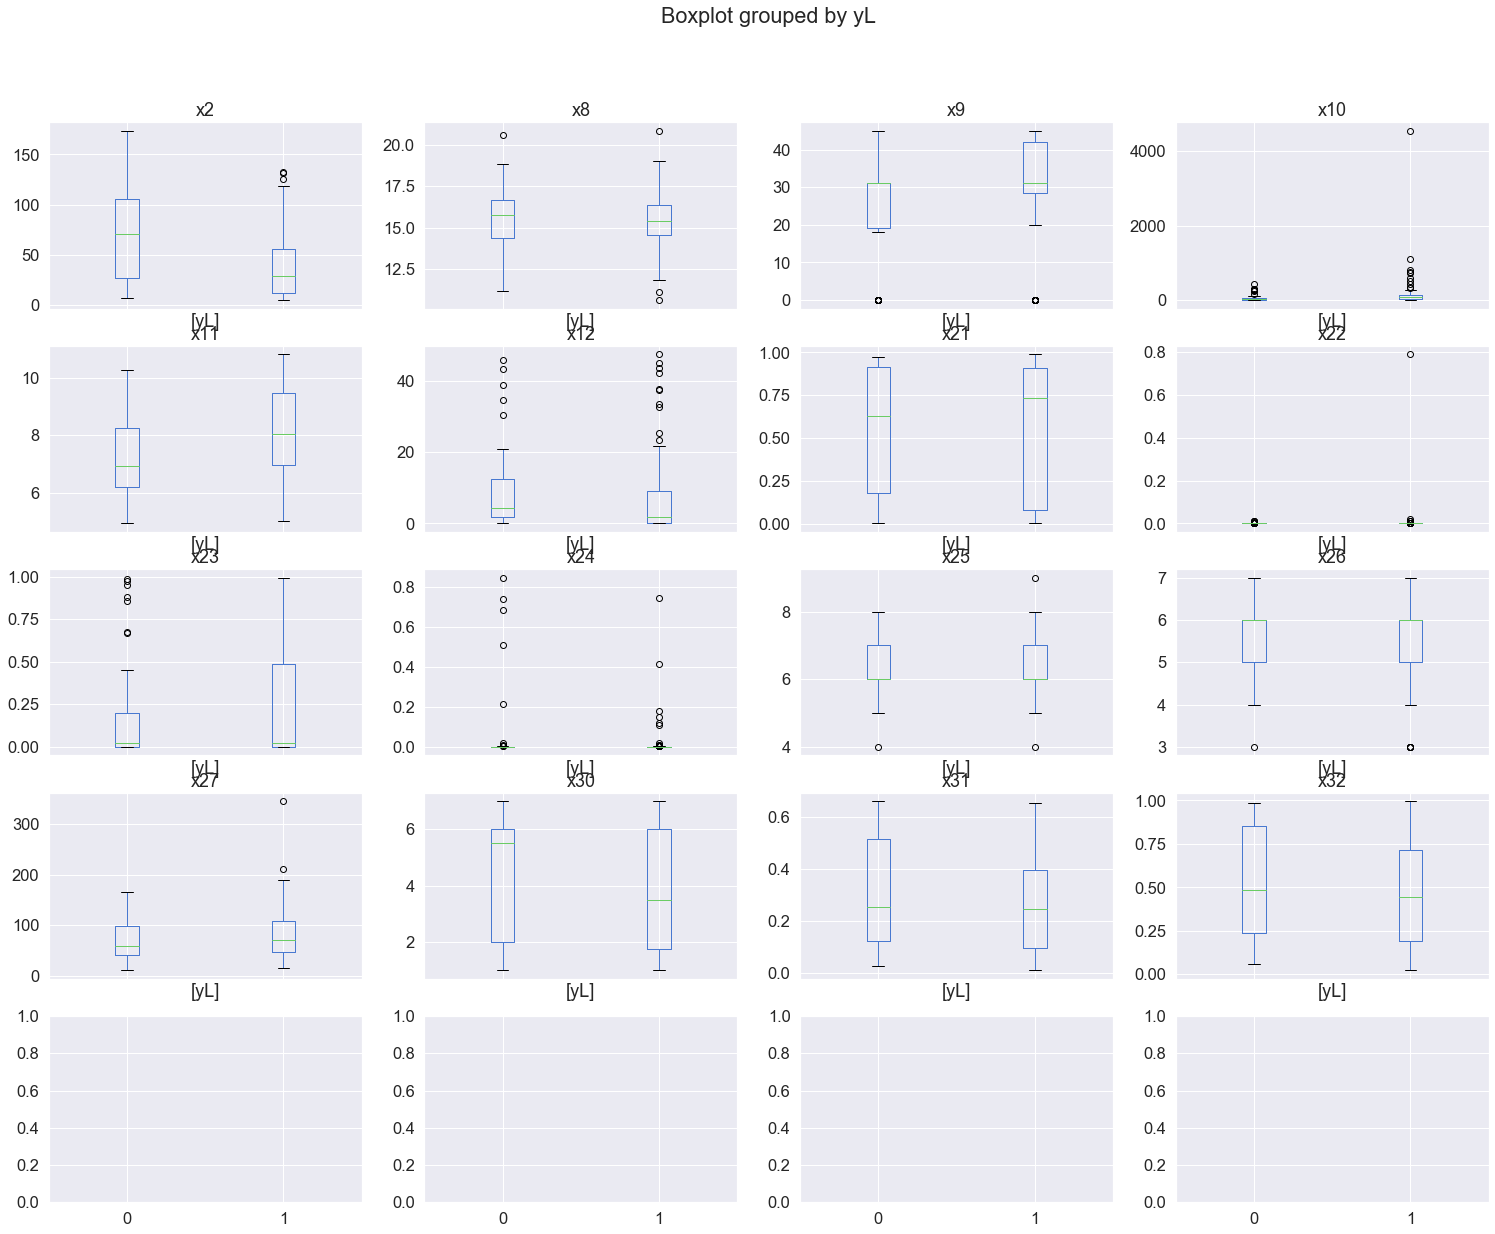

In [24]:
# Boxplot de las variables numéricas
all_total_columns = subset.columns.values.tolist()
figure, axs = plt.subplots(5,4, sharey=False, sharex=True, figsize=(25,20))

indice = 2
for i in range(8):
    for j in range(4):
        try:
            boxplot = subset.boxplot(column=[all_total_columns[indice]], return_type='axes', by=['yL'], ax=axs[i][j])
            indice += 1
        except IndexError:
            pass

### Detección de outliers

In [25]:
def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p
    return df

In [26]:
data_clean = outlier_detect(data)
data_clean.head()

,yL,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32
0,1,49.856,118.8,1,0.0,0.0,0.0,0.0,16.32096,31.0,...,0.9709,0.0003,6.0,6.0,24.7138,0.0,0.0,7,0.056546,0.112860
1,1,71.836,34.8,0,0.0,0.0,0.0,0.0,15.00535,44.0,...,0.4200,0.0000,8.0,4.0,38.0658,0.0,0.0,7,0.655260,0.886908
2,1,66.725,41.8,0,0.0,0.0,0.0,0.0,17.07023,27.0,...,0.9650,0.0000,6.0,6.0,48.3807,0.0,0.0,4,0.067855,0.133944
3,0,41.696,132.0,0,0.0,0.0,0.0,0.0,16.31460,31.0,...,0.0091,0.0001,6.0,4.0,59.8410,0.0,0.0,7,0.133230,0.260102
4,1,71.351,24.2,1,0.0,0.0,0.0,0.0,15.46372,31.0,...,0.0051,0.0000,5.0,7.0,175.9250,0.0,0.0,3,0.318584,0.627729


### Análisis de variables categóricas

In [28]:
from statsmodels.graphics.mosaicplot import mosaic

In [29]:
all_total_coloumns = data.columns.values.tolist()
categoricas = [x for x in all_total_coloumns if x not in subset.iloc[:, 1:]]


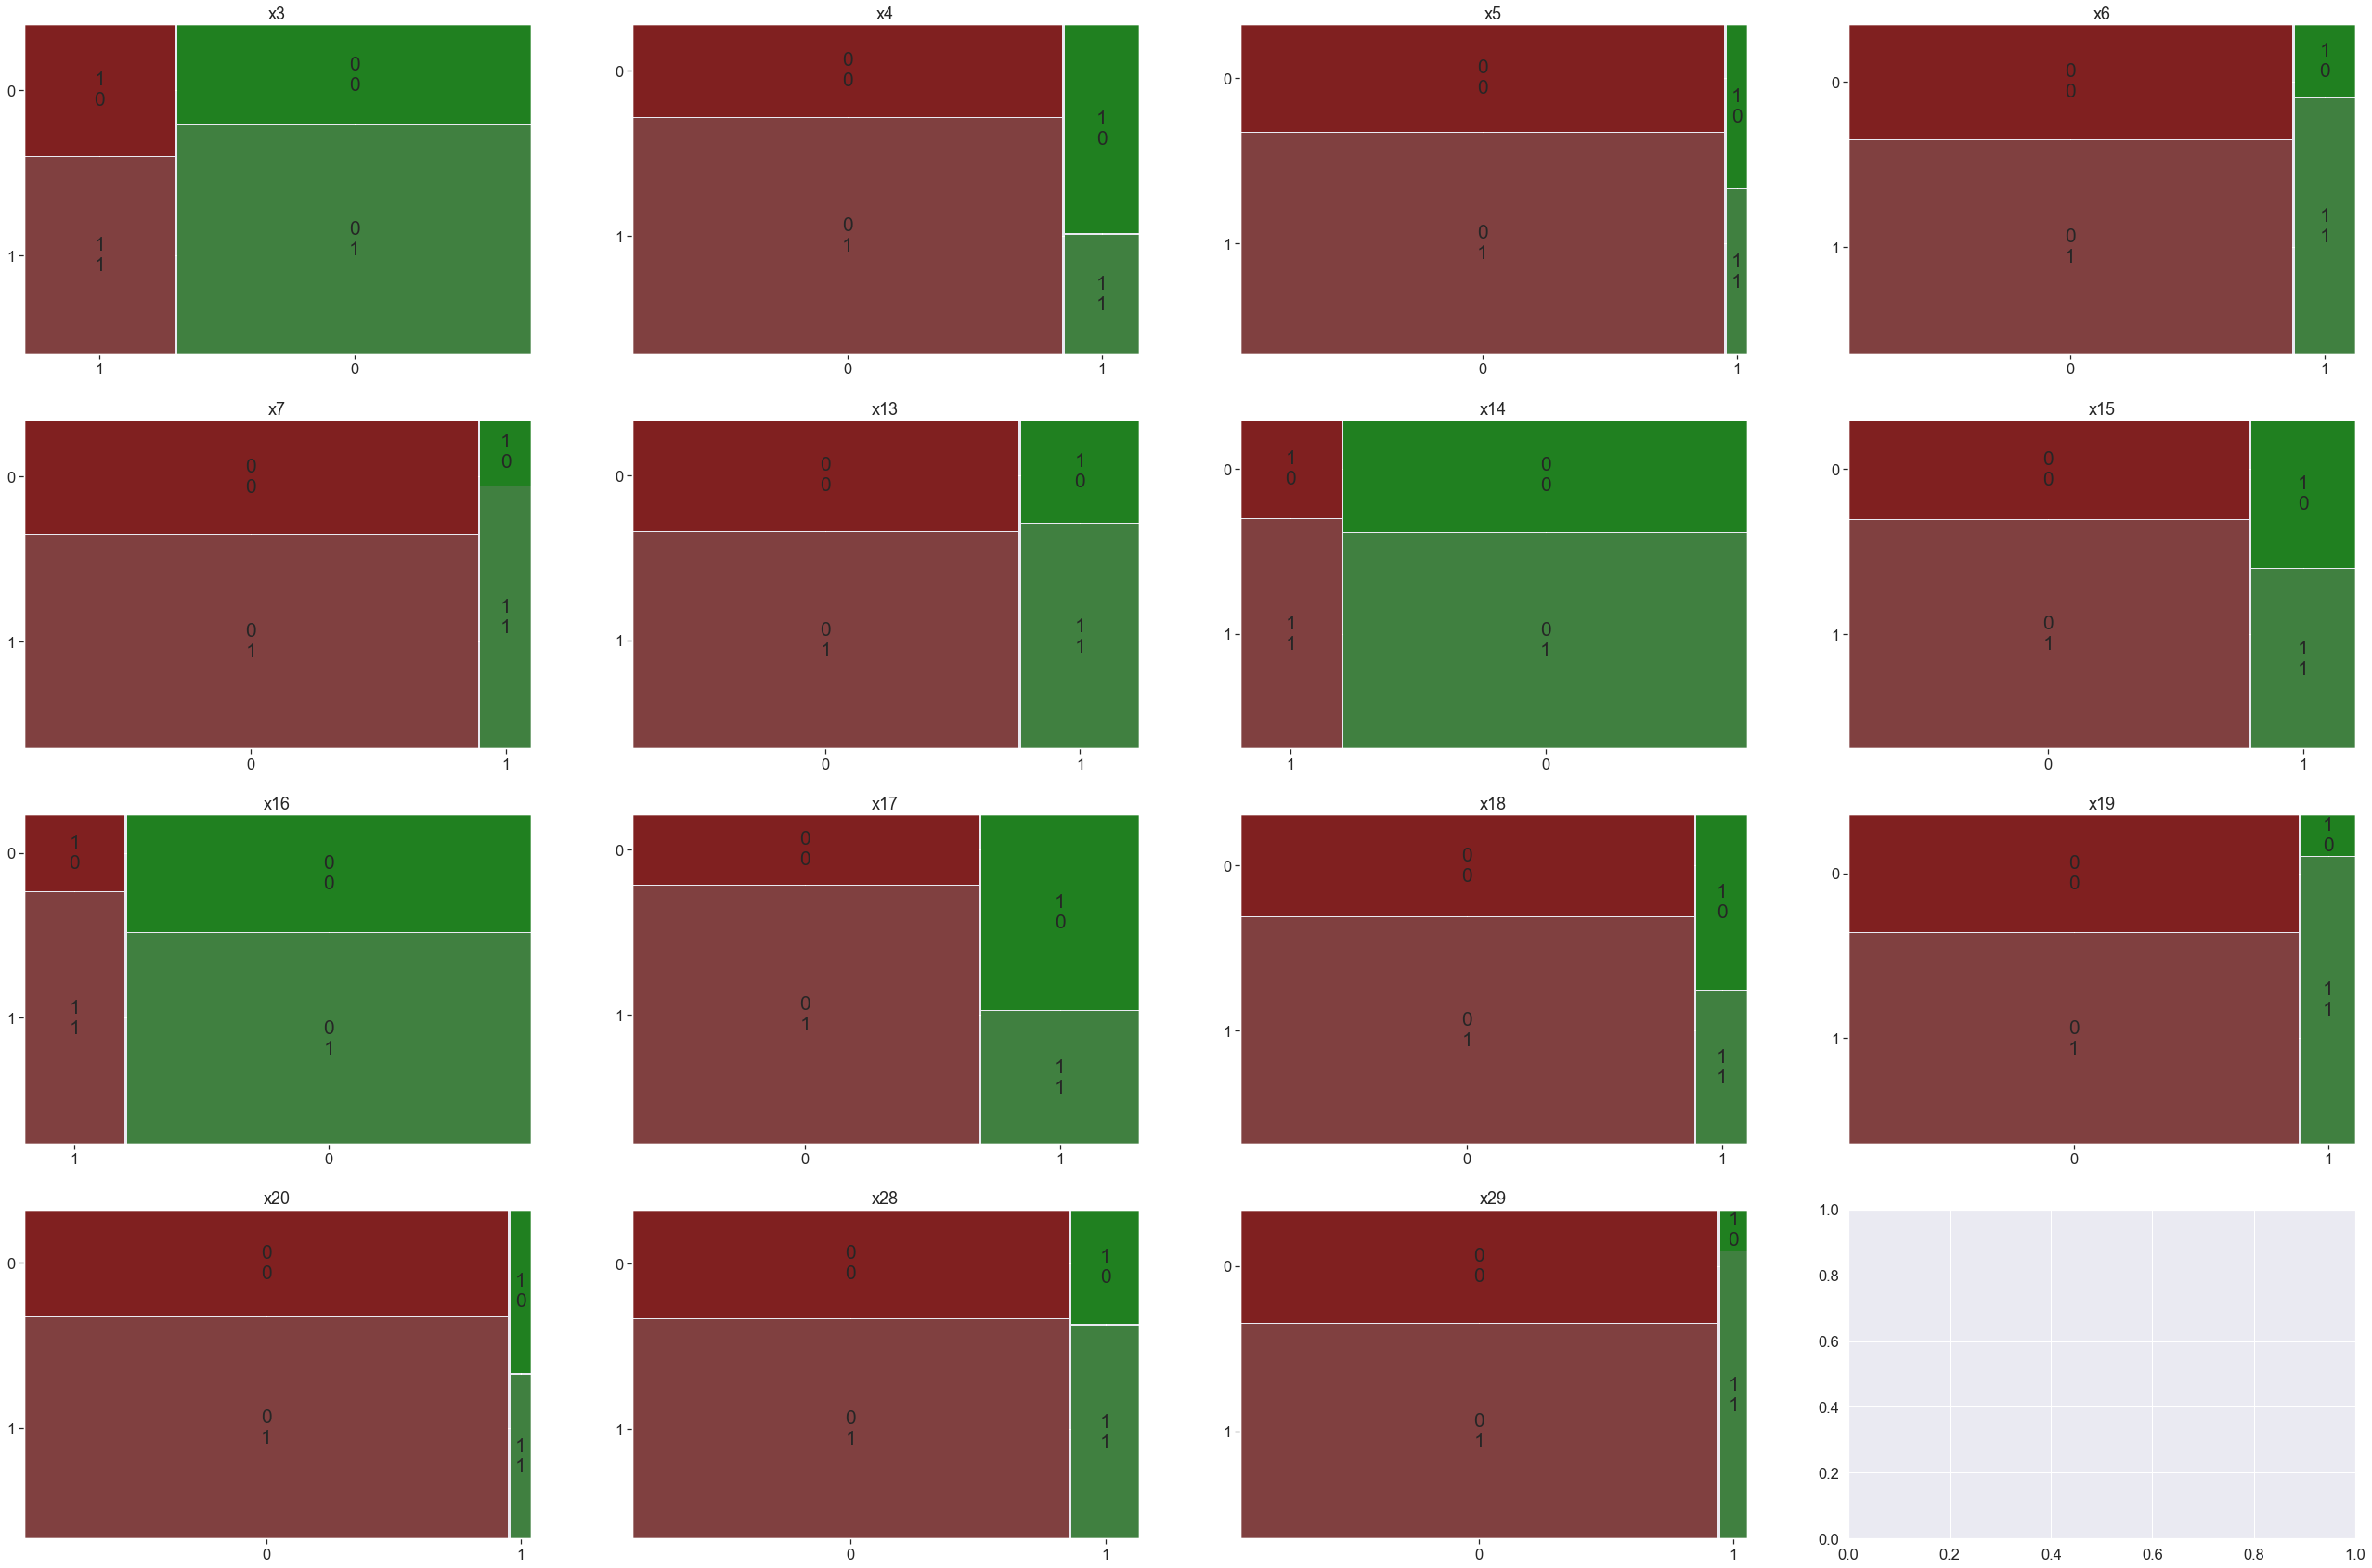

In [43]:
# Mosaic Plot de las variables categóricas vs Attrition 

figure, axs = plt.subplots(4,4, sharey=False, sharex=False, figsize=(45,30))
plt.rcParams.update({'font.size': 25})


indice = 1
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        try:
            mosaic(data, [categoricas[indice],'yL'],ax=axs[i][j], title=categoricas[indice], axes_label=True)
            
            indice += 1
        except IndexError:
            pass

### Estandarizando las variables numéricas

In [30]:
numericas = subset.iloc[:, 1:]

In [31]:
# Estandarizando las variables continuas
# = ( x – media ) / desviación típica
from scipy import stats
import numpy as np
num_st = stats.zscore(numericas)
num_st = pd.DataFrame(num_st, columns=['x1','x2','x8','x9','x10','x11','x12','x21','x22','x23','x24','x25','x26','x27','x30','x31','x32'])
num_st.head()

,x1,x2,x8,x9,x10,x11,x12,x21,x22,x23,x24,x25,x26,x27,x30,x31,x32
0,-1.443483,1.662606,0.476844,-1.793738,-0.305009,-1.093773,0.142148,-1.476518,-0.096576,2.092018,-0.240894,-0.412427,0.430348,-1.124346,1.410446,-1.173105,-1.267575
1,0.750834,-0.378196,-0.207152,1.066535,-0.049516,-0.281241,0.232064,-0.683480,-0.095020,0.516205,-0.243133,1.758240,-1.651981,-0.845203,1.410446,1.926569,1.326759
2,0.240590,-0.208129,0.866395,-0.038570,-0.324912,0.033615,0.455721,-1.464073,-0.096576,2.075141,-0.243133,-0.412427,0.430348,-0.629555,0.033655,-1.114558,-1.196908
3,-2.258116,1.983304,0.473537,-1.793738,-0.327732,-0.172328,1.984470,0.982033,-0.096576,-0.659147,-0.242387,-0.412427,-1.651981,-0.389961,1.410446,-0.776095,-0.774072
4,0.702415,-0.635726,-2.233465,0.221454,0.030363,0.934933,-0.681071,0.648136,-0.096576,-0.670589,-0.243133,-1.497760,1.471513,2.036944,-0.425275,0.183521,0.458084


In [32]:
# dataframe con variables estandarizadas y dicotomas
categ_sub = ['yL','x3','x4','x5','x6','x7','x13','x14','x15','x16','x17','x18','x19','x20','x28','x29'] 
categ = data[categ_sub]
type(categ)
data_st = pd.concat([categ, num_st], axis=1)
data_st.head()

,yL,x3,x4,x5,x6,x7,x13,x14,x15,x16,...,x21,x22,x23,x24,x25,x26,x27,x30,x31,x32
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.476518,-0.096576,2.092018,-0.240894,-0.412427,0.430348,-1.124346,1.410446,-1.173105,-1.267575
1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.683480,-0.095020,0.516205,-0.243133,1.758240,-1.651981,-0.845203,1.410446,1.926569,1.326759
2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.464073,-0.096576,2.075141,-0.243133,-0.412427,0.430348,-0.629555,0.033655,-1.114558,-1.196908
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.982033,-0.096576,-0.659147,-0.242387,-0.412427,-1.651981,-0.389961,1.410446,-0.776095,-0.774072
4,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.648136,-0.096576,-0.670589,-0.243133,-1.497760,1.471513,2.036944,-0.425275,0.183521,0.458084


### Partición de la base usando una función de shuffle

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import sklearn
data2 = sklearn.utils.shuffle(data_st)
data2.head()

,yL,x3,x4,x5,x6,x7,x13,x14,x15,x16,...,x21,x22,x23,x24,x25,x26,x27,x30,x31,x32
148,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.052593,-0.096576,1.245902,-0.243133,-0.412427,0.430348,-1.409226,1.410446,1.078500,0.932058
18,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.453217,-0.096576,-0.655714,5.262558,-2.583094,1.471513,-0.360220,0.951515,0.588231,0.869471
98,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.083207,-0.096576,-0.623964,-0.240894,0.672907,-0.610817,-0.707984,0.033655,1.216986,1.619958
133,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.387814,-0.096576,2.027944,-0.216262,-0.412427,0.430348,-0.130924,1.410446,-0.953367,-1.007038
92,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.917160,-0.096576,-0.683747,-0.243133,-1.497760,1.471513,1.313455,0.951515,-0.570114,-0.487792


### Trainig, and test (80% - 20% ) 

In [34]:
# separate dataset into train and test
train, test = train_test_split(data2, test_size = 0.2)

In [35]:
train.shape

(120, 33)

In [36]:
test.shape

(30, 33)

In [37]:
X_train = train.drop('yL',  axis = 1)
y_train = train['yL']
X_test = test.drop('yL',  axis = 1)
y_test = test['yL']

# 3. Feature selection

### Removing constant feature

In [38]:
sel = VarianceThreshold(threshold=0)
sel.fit(train)  # fit finds the features with zero variance

VarianceThreshold(threshold=0)

In [39]:
# get_support is a boolean vector that indicates which features are retained
# if we sum over get_support, we get the number of features that are not constant
sum(sel.get_support())

20

### Removing quasi-constant features

In [40]:
sel = VarianceThreshold(
    threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(train)  # fit finds the features with low variance

VarianceThreshold(threshold=0.01)

In [41]:
# get_support is a boolean vector that indicates which features 
# are retained. If we sum over get_support, we get the number
# of features that are not quasi-constant
sel.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True])

No se presentan variables con varianza constante

### Mutual information for feature selection

In [42]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [43]:
# calculate the mutual information between the variables and the target
# this returns the mutual information value of each feature
# the smaller the value the less information the feature has about the
# target
mi = mutual_info_classif(X_train.fillna(0), y_train)
mi

array([0.02400942, 0.        , 0.02265161, 0.01952363, 0.        ,
       0.07659586, 0.        , 0.        , 0.        , 0.07119051,
       0.        , 0.        , 0.        , 0.00433981, 0.        ,
       0.0715091 , 0.05081381, 0.04975945, 0.        , 0.14149536,
       0.07950912, 0.01101803, 0.05408645, 0.08290613, 0.        ,
       0.        , 0.        , 0.02575875, 0.01773168, 0.06591409,
       0.03189579, 0.00289038])

In [44]:
# let's add the variable names and order the features
# according to the MI for clearer visualisation
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

x10    0.141495
x22    0.082906
x11    0.079509
x13    0.076596
x1     0.071509
x17    0.071191
x30    0.065914
x21    0.054086
x2     0.050814
x8     0.049759
x31    0.031896
x26    0.025759
x3     0.024009
x5     0.022652
x6     0.019524
x27    0.017732
x12    0.011018
x28    0.004340
x32    0.002890
x15    0.000000
x4     0.000000
x7     0.000000
x14    0.000000
x9     0.000000
x16    0.000000
x18    0.000000
x19    0.000000
x20    0.000000
x29    0.000000
x24    0.000000
x23    0.000000
x25    0.000000
dtype: float64

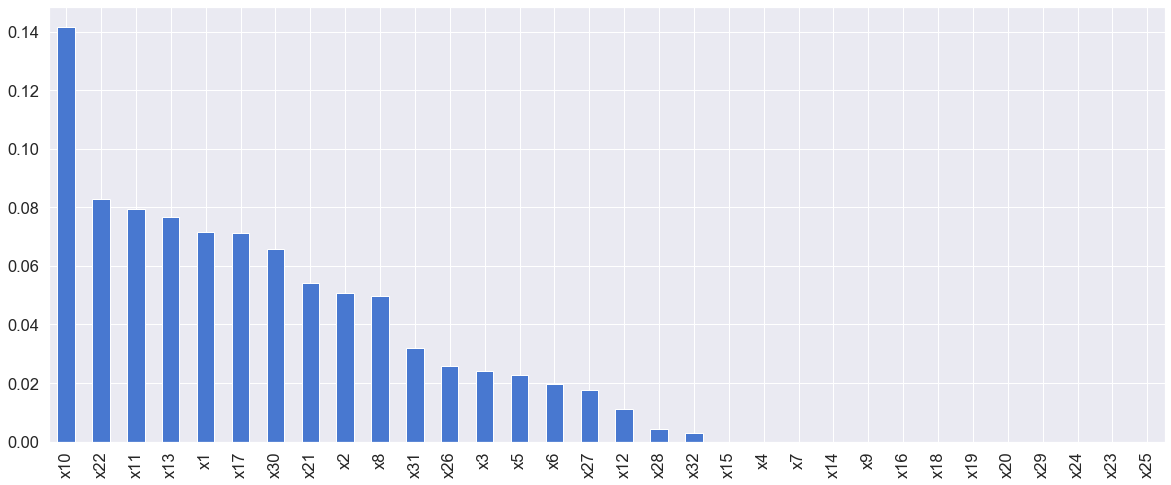

In [45]:
# and now let's plot the ordered MI values per feature
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [169]:
# here I will select the top 50 percentile
sel_ = SelectPercentile(mutual_info_classif, percentile=50).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['x3', 'x4', 'x13', 'x18', 'x19', 'x28', 'x1', 'x9', 'x10', 'x11', 'x12',
       'x21', 'x22', 'x24', 'x27', 'x31'],
      dtype='object')

### Univariate roc-auc or mse feature selection

In [170]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

In [171]:
# loop to build a tree, make predictions and get the roc-auc
# for each feature of the train set

roc_values = []
for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

In [172]:
# let's add the variable names and order it for clearer visualisation
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False)

x1     0.770833
x17    0.770833
x22    0.680556
x2     0.666667
x4     0.625000
x25    0.625000
x32    0.604167
x30    0.597222
x29    0.583333
x10    0.583333
x26    0.572917
x16    0.562500
x21    0.562500
x14    0.520833
x15    0.520833
x19    0.520833
x6     0.500000
x11    0.500000
x13    0.500000
x18    0.479167
x7     0.479167
x20    0.479167
x5     0.479167
x8     0.479167
x12    0.465278
x28    0.458333
x31    0.437500
x9     0.402778
x27    0.375000
x3     0.354167
x24    0.333333
x23    0.315972
dtype: float64

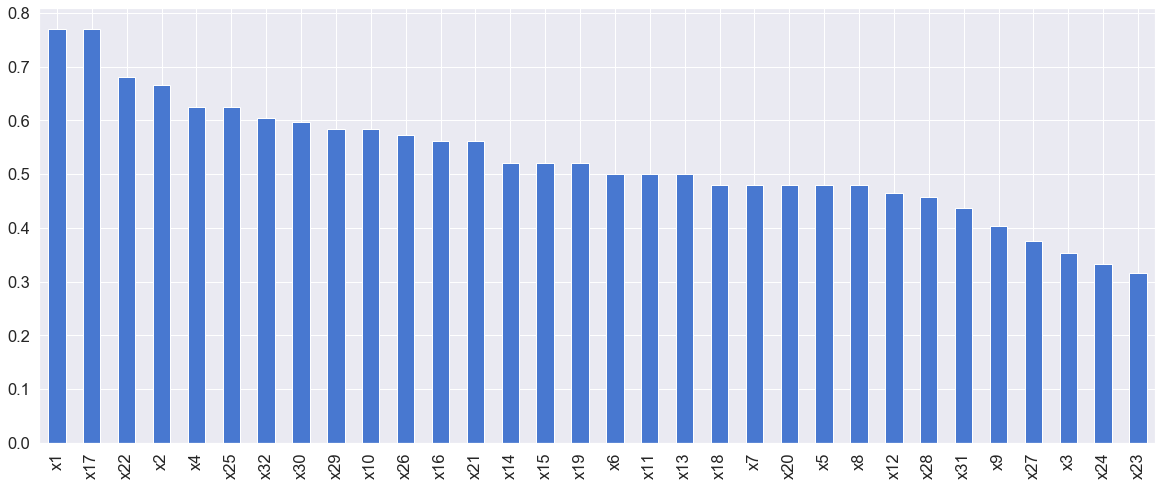

In [173]:
# and now let's plot
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [174]:
# a roc auc value of 0.5 indicates random decision
# let's check how many features show a roc-auc value
# higher than random

len(roc_values[roc_values > 0.5])

16

### Fisher score for categorical variables

In [175]:
from sklearn.feature_selection import chi2

In [176]:
x_train_categ = train[categoricas]
y_train_categ = train['yL']
x_train_categ.head()

,yL,x3,x4,x5,x6,x7,x13,x14,x15,x16,x17,x18,x19,x20,x28,x29
92,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
24,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
27,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
115,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [177]:
# calculate the chi2 p_value between each of the variables
# and the target
# it returns 2 arrays, one contains the F-Scores which are then 
# evaluated against the chi2 distribution to obtain the pvalue
# the pvalues are in the second array, see below

f_score = chi2(x_train_categ.fillna(0), y_train_categ)
f_score

(array([4.40000000e+01, 1.87408713e+00, 6.97607656e+00, 1.17224880e+00,
        1.03386088e+00, 1.61852980e+00, 0.00000000e+00, 3.96139251e-01,
        1.53269537e+00, 8.36015659e-01, 9.37799043e+00, 2.52768284e+00,
        3.06220096e+00, 1.17224880e+00, 3.82775120e-02, 2.34449761e-01]),
 array([3.28375865e-11, 1.71007708e-01, 8.26065133e-03, 2.78939653e-01,
        3.09253581e-01, 2.03296909e-01, 1.00000000e+00, 5.29089874e-01,
        2.15708367e-01, 3.60538786e-01, 2.19606161e-03, 1.11864379e-01,
        8.01330584e-02, 2.78939653e-01, 8.44886944e-01, 6.28243848e-01]))

In [179]:
# let's add the variable names and order it for clearer visualisation
pvalues = pd.Series(f_score[1])
pvalues.index = x_train_categ.columns
pvalues.sort_values(ascending= True)

yL     3.283759e-11
x17    2.196062e-03
x4     8.260651e-03
x19    8.013306e-02
x18    1.118644e-01
x3     1.710077e-01
x7     2.032969e-01
x15    2.157084e-01
x5     2.789397e-01
x20    2.789397e-01
x6     3.092536e-01
x16    3.605388e-01
x14    5.290899e-01
x29    6.282438e-01
x28    8.448869e-01
x13    1.000000e+00
dtype: float64

### Step forward selection

In [180]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [181]:
# step forward feature selection
# I indicate that I want to select 10 features from
# the total, and that I want to select those features
# based on the optimal roc_auc

features = [15, 16,17,18, 19, 20, 21, 22]
selected_features= []
for i in features:
    
    sfs1 = SFS(RandomForestClassifier(n_estimators = 200), 
           n_jobs=-1,
           k_features=i, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=5)

    sfs1 = sfs1.fit(np.array(X_train.fillna(0)), y_train)
    
    selected_feat= X_train.columns[list(sfs1.k_feature_idx_)]
    selected_features.append(selected_feat)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  32 | elapsed:    3.2s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    3.3s finished

[2019-09-07 16:49:30] Features: 1/15 -- score: 0.712037037037037[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  31 | elapsed:    1.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    2.2s finished

[2019-09-07 16:49:32] Features: 2/15 -- score: 0.770925925925926[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    1.2s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.4s finished

[2019-09-07 16:49:34] Features: 3/15 -- score: 0.7858333333333334[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  

[Parallel(n_jobs=-1)]: Done   3 out of  22 | elapsed:    1.2s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  15 out of  22 | elapsed:    1.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    1.9s finished

[2019-09-07 16:50:22] Features: 11/16 -- score: 0.76[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    1.2s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.9s finished

[2019-09-07 16:50:24] Features: 12/16 -- score: 0.7544444444444445[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:    1.2s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.9s finished

[2019-09-07 16:50:26] Features: 13/16 -- score: 0.7608333333333334[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  19 | 

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.5s finished

[2019-09-07 16:51:15] Features: 3/18 -- score: 0.7849537037037038[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  29 | elapsed:    1.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    2.5s finished

[2019-09-07 16:51:17] Features: 4/18 -- score: 0.7908796296296297[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  28 | elapsed:    1.3s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    2.4s finished

[2019-09-07 16:51:20] Features: 5/18 -- score: 0.7881018518518518[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  27 | elapsed:    1.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:    2.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  27 ou

[Parallel(n_jobs=-1)]: Done   4 out of  23 | elapsed:    1.4s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  16 out of  23 | elapsed:    1.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    2.2s finished

[2019-09-07 16:52:08] Features: 10/19 -- score: 0.7580092592592592[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  22 | elapsed:    1.4s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done  15 out of  22 | elapsed:    1.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    2.2s finished

[2019-09-07 16:52:10] Features: 11/19 -- score: 0.7574074074074074[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    1.4s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    2.2s finished

[2019-09-07 16:52:12] Features: 12/19 -- score: 0.7635185185185185[Parallel(n_jobs=-1)]: Usin

[Parallel(n_jobs=-1)]: Done   4 out of  17 | elapsed:    1.2s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  13 out of  17 | elapsed:    1.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    1.9s finished

[2019-09-07 16:53:03] Features: 16/20 -- score: 0.7382870370370371[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  16 | elapsed:    1.2s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done  12 out of  16 | elapsed:    1.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.3s finished

[2019-09-07 16:53:05] Features: 17/20 -- score: 0.7526851851851852[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    1.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.3s finished

[2019-09-07 16:53:06] Features: 18/20 -- score: 0.7475000000000002[Parallel(n_jobs=-1)]: Usin

[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    1.0s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:    1.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.2s finished

[2019-09-07 16:53:53] Features: 21/21 -- score: 0.745925925925926[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  32 | elapsed:    2.7s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    2.8s finished

[2019-09-07 16:53:56] Features: 1/22 -- score: 0.7169444444444444[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  31 | elapsed:    1.4s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    2.7s finished

[2019-09-07 16:53:59] Features: 2/22 -- score: 0.7766666666666667[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 ou

In [186]:
selected_features[4]

Index(['x3', 'x4', 'x5', 'x6', 'x7', 'x13', 'x14', 'x15', 'x17', 'x19', 'x28',
       'x29', 'x8', 'x9', 'x10', 'x11', 'x22', 'x23', 'x25'],
      dtype='object')

In [183]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4, n_jobs=8)
    rf.fit(X_train, y_train)
    print('__________________________')
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))

    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    

In [184]:
# evaluate performance of algorithm built
# using selected features

for selected_feat in selected_features:
    run_randomForests(X_train[selected_feat].fillna(0),
                  X_test[selected_feat].fillna(0),
                  y_train, y_test)

__________________________
Train set
Random Forests roc-auc: 0.9841507177033493
Test set
Random Forests roc-auc: 0.7569444444444444
__________________________
Train set
Random Forests roc-auc: 0.9832535885167464
Test set
Random Forests roc-auc: 0.8263888888888888
__________________________
Train set
Random Forests roc-auc: 0.9476674641148326
Test set
Random Forests roc-auc: 0.7291666666666666
__________________________
Train set
Random Forests roc-auc: 0.9611244019138756
Test set
Random Forests roc-auc: 0.7638888888888888
__________________________
Train set
Random Forests roc-auc: 0.9820574162679425
Test set
Random Forests roc-auc: 0.8402777777777777
__________________________
Train set
Random Forests roc-auc: 0.9835526315789473
Test set
Random Forests roc-auc: 0.763888888888889
__________________________
Train set
Random Forests roc-auc: 0.978468899521531
Test set
Random Forests roc-auc: 0.7708333333333334
__________________________
Train set
Random Forests roc-auc: 0.985047846889952

### step backward feature selection

In [187]:
# step backward feature selection
# I indicate that I want to select 15 features from
# the total, and that I want to select those features
# based on the optimal roc_auc

features = [15, 16,17,18, 19, 20, 21, 22]
selected_features2= []
for i in features:
    
    sfs1 = SFS(RandomForestClassifier(n_estimators = 100), 
           n_jobs=-1,
           k_features=i, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=5)

    sfs1 = sfs1.fit(np.array(X_train.fillna(0)), y_train)

    selected_feat2= X_train.columns[list(sfs1.k_feature_idx_)]
    selected_features2.append(selected_feat2)
sfs1.k_feature_idx_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  32 | elapsed:    2.5s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    2.6s finished

[2019-09-07 18:34:17] Features: 31/15 -- score: 0.7044907407407408[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  31 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.2s finished

[2019-09-07 18:34:18] Features: 30/15 -- score: 0.7048148148148149[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.2s finished

[2019-09-07 18:34:19] Features: 29/15 -- score: 0.7099537037037037[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out

[Parallel(n_jobs=-1)]: Done   6 out of  24 | elapsed:    0.6s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  19 out of  24 | elapsed:    1.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.0s finished

[2019-09-07 18:34:44] Features: 23/16 -- score: 0.7150462962962962[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  23 | elapsed:    0.6s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  16 out of  23 | elapsed:    0.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    1.0s finished

[2019-09-07 18:34:45] Features: 22/16 -- score: 0.732962962962963[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  22 | elapsed:    0.6s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  15 out of  22 | elapsed:    0.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    1.0s finished

[2019-09-07 1

[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.3s finished

[2019-09-07 18:35:13] Features: 29/18 -- score: 0.71[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  29 | elapsed:    0.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    1.3s finished

[2019-09-07 18:35:14] Features: 28/18 -- score: 0.7191203703703705[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  28 | elapsed:    0.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    1.3s finished

[2019-09-07 18:35:15] Features: 27/18 -- score: 0.7016203703703704[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  27 | elapsed:    0.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  24 out of  27 | 

[2019-09-07 18:35:41] Features: 19/19 -- score: 0.7357407407407408[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  32 | elapsed:    1.2s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    1.3s finished

[2019-09-07 18:35:43] Features: 31/20 -- score: 0.7071296296296297[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  31 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.4s finished

[2019-09-07 18:35:44] Features: 30/20 -- score: 0.6993055555555555[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.4s finished

[2019-09-07 18:35:46] Features: 29/20 -- score: 0.7124074074074075[Parallel(n_jobs=-1)]: Using backend LokyBacke

[Parallel(n_jobs=-1)]: Done  16 out of  31 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.4s finished

[2019-09-07 18:36:13] Features: 30/22 -- score: 0.7094444444444445[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.3s finished

[2019-09-07 18:36:14] Features: 29/22 -- score: 0.7142129629629631[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  29 | elapsed:    0.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    1.4s finished

[2019-09-07 18:36:16] Features: 28/22 -- score: 0.7157870370370369[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  28 | elapsed:    0.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  28

(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 13, 14, 17, 20, 21, 23, 24, 25, 26, 27, 28, 29)

In [190]:
selected_features2[7]

Index(['x3', 'x4', 'x5', 'x6', 'x7', 'x13', 'x14', 'x15', 'x17', 'x18', 'x28',
       'x29', 'x8', 'x11', 'x12', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27',
       'x30'],
      dtype='object')

In [189]:
# evaluate performance of algorithm built
# using selected features

for selected_feat2 in selected_features2:
    run_randomForests(X_train[selected_feat2].fillna(0),
                  X_test[selected_feat2].fillna(0),
                  y_train, y_test)

__________________________
Train set
Random Forests roc-auc: 0.9895334928229664
Test set
Random Forests roc-auc: 0.7916666666666667
__________________________
Train set
Random Forests roc-auc: 0.9754784688995215
Test set
Random Forests roc-auc: 0.798611111111111
__________________________
Train set
Random Forests roc-auc: 0.9904306220095693
Test set
Random Forests roc-auc: 0.7847222222222222
__________________________
Train set
Random Forests roc-auc: 0.9874401913875598
Test set
Random Forests roc-auc: 0.7777777777777778
__________________________
Train set
Random Forests roc-auc: 0.9802631578947368
Test set
Random Forests roc-auc: 0.75
__________________________
Train set
Random Forests roc-auc: 0.9898325358851674
Test set
Random Forests roc-auc: 0.7916666666666667
__________________________
Train set
Random Forests roc-auc: 0.9700956937799043
Test set
Random Forests roc-auc: 0.7569444444444444
__________________________
Train set
Random Forests roc-auc: 0.9766746411483254
Test set
Ra

### Lasso regularisation

In [267]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

In [268]:
# here I will do the model fitting and feature selection
# altogether in one line of code

# first I specify the Logistic Regression model, and I
# make sure I select the Lasso (l1) penalty.

# Then I use the selectFromModel object from sklearn, which
# will select in theory the features which coefficients are non-zero

sel_ = SelectFromModel(LogisticRegression(C=1.5, penalty='l1'))
RL = sel_.fit(X_train.fillna(0), y_train)


/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [269]:
# this command let's me visualise those features that were kept
sel_.get_support()

array([ True,  True, False,  True, False, False,  True, False, False,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True, False,  True])

In [270]:
# Now I make a list with the selected features
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))


total features: 32
selected features: 22
features with coefficients shrank to zero: 10


In [271]:
selected_feat

Index(['x3', 'x4', 'x6', 'x14', 'x17', 'x18', 'x19', 'x20', 'x28', 'x1', 'x2',
       'x9', 'x10', 'x11', 'x12', 'x21', 'x23', 'x24', 'x25', 'x27', 'x30',
       'x32'],
      dtype='object')

### Elasticnet regularisation

In [274]:
sel_ = SelectFromModel(LogisticRegression(C=1.0, penalty='l1'))
regr = ElasticNet(random_state=0)
regr = sel_.fit(X_train.fillna(0), y_train)

/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [275]:
# this command let's me visualise those features that were kept
sel_.get_support()

array([ True,  True, False,  True, False, False,  True, False, False,
        True,  True,  True, False, False, False,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True, False,  True])

In [276]:
# Now I make a list with the selected features
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 32
selected features: 20
features with coefficients shrank to zero: 12


In [277]:
selected_feat

Index(['x3', 'x4', 'x6', 'x14', 'x17', 'x18', 'x19', 'x1', 'x2', 'x9', 'x10',
       'x11', 'x12', 'x21', 'x23', 'x24', 'x25', 'x27', 'x30', 'x32'],
      dtype='object')

### Random Forest importance

In [278]:
from sklearn.ensemble import RandomForestClassifier

In [279]:
# here I will do the model fitting and feature selection
# altogether in one line of code

# first I specify the Random Forest instance, indicating
# the number of trees

# Then I use the selectFromModel object from sklearn
# to automatically select the features

# SelectFrom model will select those features which importance
# is greater than the mean importance of all the features
# by default, but you can alter this threshold if you want to

sel_ = SelectFromModel(RandomForestClassifier(n_estimators=200, min_samples_split=5))
sel_.fit(X_train.fillna(0), y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=5,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=200, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

In [280]:
# this command let's me visualise those features that were selected.
# sklearn will select those features which importance values
# are greater than the mean of all the coefficients.
sel_.get_support()

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True,  True])

In [282]:
# let's make a list and count the selected features
selected_feat = X_train.columns[(sel_.get_support())]
selected_feat

Index(['x17', 'x1', 'x2', 'x8', 'x10', 'x11', 'x12', 'x21', 'x22', 'x23',
       'x24', 'x27', 'x31', 'x32'],
      dtype='object')

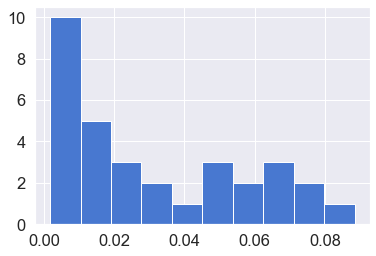

In [283]:
# and now let's plot the distribution of importances
pd.Series(sel_.estimator_.feature_importances_.ravel()).hist()

In [284]:
# and now, let's compare the  amount of selected features
# with the amount of features which importance is above the
# mean importance, to make sure we understand the output of
# sklearn

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients greater than the mean coefficient: {}'.format(
    np.sum(sel_.estimator_.feature_importances_ > sel_.estimator_.feature_importances_.mean())))

total features: 32
selected features: 14
features with coefficients greater than the mean coefficient: 14


In [285]:
# evaluate performance of algorithm built
# using selected features

run_randomForests(X_train[selected_feat].fillna(0),
                  X_test[selected_feat].fillna(0),
                  y_train, y_test)

__________________________
Train set
Random Forests roc-auc: 0.9922248803827751
Test set
Random Forests roc-auc: 0.7847222222222222


### Recursive feature selection using random forests importance

In [286]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFECV

In [299]:
# here I will do the model fitting and feature selection
# altogether in one line of code

# first I specify the Random Forest instance, indicating
# the number of trees

# Then I use the selectFromModel object from sklearn
# to automatically select the features

# RFE will remove one feature at each iteration, the
# least  important.
# then it will build another random forest and repeat
# till a criteria is met.

# in sklearn the criteria to stop is an arbitrary number
# of features to select, that you need to decide before hand
# not the best solution, but a solution

#sel_ = RFE(RandomForestClassifier(n_estimators=200), n_features_to_select=20)
sel = RFECV(estimator=LogisticRegression(solver='liblinear'), cv=5, scoring='accuracy')
sel_.fit(X_train.fillna(0), y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=200, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=20, step=1, verbose=0)

In [300]:
# this command let's me visualise those features that were selected.
sel_.get_support()

array([False,  True, False, False, False, False, False, False, False,
        True,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [301]:
# let's add the variable names and order it for clearer visualisation
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

20

In [302]:
# let's display the list of features
selected_feat

Index(['x4', 'x17', 'x18', 'x1', 'x2', 'x8', 'x9', 'x10', 'x11', 'x12', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x30', 'x31', 'x32'],
      dtype='object')

In [303]:
# these are the features selected in the previous
# lecture when we used SelectFromModel from sklearn
previous_lecture_selected_features = ['x4', 'x17', 'x18', 'x1', 'x2', 'x8', 'x9', 'x10', 'x11', 'x12', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x30', 'x31', 'x32']

In [304]:
# evaluate performance of algorithm built
# using selected features

run_randomForests(X_train[selected_feat].fillna(0),
                  X_test[selected_feat].fillna(0),
                  y_train, y_test)

__________________________
Train set
Random Forests roc-auc: 0.9952153110047848
Test set
Random Forests roc-auc: 0.7708333333333334


In [305]:
# features selected altogether
run_randomForests(X_train[previous_lecture_selected_features].fillna(0),
                  X_test[previous_lecture_selected_features].fillna(0),
                  y_train, y_test)

__________________________
Train set
Random Forests roc-auc: 0.9952153110047848
Test set
Random Forests roc-auc: 0.7708333333333334


### Gradient Boosted trees importance

In [306]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.metrics import roc_auc_score

In [308]:
# first I will select features all together in one go
# by contemplating their importance after fitting only
# 1 gradient boosted tree

sel_ = SelectFromModel(GradientBoostingClassifier())
sel_.fit(X_train.fillna(0), y_train)

SelectFromModel(estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                     init=None,
                                                     learning_rate=0.1,
                                                     loss='deviance',
                                                     max_depth=3,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                            

In [309]:
# let's add the variable names and order it for clearer visualisation
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

9

In [310]:
# let's add the variable names and order it for clearer visualisation
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

9

In [311]:
# next I will select features recursively for comparison
sel_ = RFE(GradientBoostingClassifier(), n_features_to_select=len(selected_feat))
sel_.fit(X_train.fillna(0), y_train)

RFE(estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                         learning_rate=0.1, loss='deviance',
                                         max_depth=3, max_features=None,
                                         max_leaf_nodes=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=100,
                                         n_iter_no_change=None, presort='auto',
                                         random_state=None, subsample=1.0,
                                         tol=0.0001, validation_fraction=0.1,
                                         verbose=0, warm_start=False),
    n_features_to_s

In [312]:
# let's add the variable names and order it for clearer visualisation
selected_feat_rfe = X_train.columns[(sel_.get_support())]
len(selected_feat_rfe)

9

In [314]:
selected_feat_rfe

Index(['x1', 'x2', 'x8', 'x10', 'x11', 'x12', 'x22', 'x23', 'x27'], dtype='object')

In [315]:
# create a function to build gradient boosted trees
# and compare performance in train and test set


def run_gradientboosting(X_train, X_test, y_train, y_test):
    gb = GradientBoostingClassifier(
        n_estimators=200, random_state=39, max_depth=4)
    gb.fit(X_train, y_train)
    
    print('Train set')
    pred = gb.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(
        roc_auc_score(y_train, pred[:, 1])))
    print('Test set')
    pred = gb.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(
        roc_auc_score(y_test, pred[:, 1])))


In [316]:
# features selected recursively
run_gradientboosting(X_train[selected_feat_rfe].fillna(0),
                  X_test[selected_feat_rfe].fillna(0),
                  #X_validate[selected_feat_rfe].fillna(0),   
                  y_train, y_test)# features selected altogether

Train set
Random Forests roc-auc: 1.0
Test set
Random Forests roc-auc: 0.8472222222222222


In [317]:
# features selected altogether
run_gradientboosting(X_train[selected_feat].fillna(0),
                  X_test[selected_feat].fillna(0),
                  y_train, y_test)

Train set
Random Forests roc-auc: 1.0
Test set
Random Forests roc-auc: 0.8472222222222222


In [320]:
import pymc3 as pm
import numpy as np
import pandas as pd
import theano.tensor as tt
from scipy.special import expit
invlogit = lambda x: 1/(1 + tt.exp(-x))

In [324]:
df = train
y = np.asarray(y_train)
X = np.array(X_train)
df2 = test
df2.head()
X2 = np.array(X_test)

In [337]:
len(X)

120

In [329]:
# Model especification
def get_model(y, X):
    model = pm.Model()
    with model:
        xi = pm.Bernoulli('xi', .05, shape=X.shape[1]) #inclusion probability for each variable
        alpha = pm.Normal('alpha', mu = 0, sd = 5) # Intercept
        beta = pm.Normal('beta', mu = 0, sd = .75 , shape=X.shape[1]) #Prior for the non-zero coefficients
        p = pm.math.dot(X, xi * beta) #Deterministic function to map the stochastics to the output
        y_obs = pm.Bernoulli('y_obs', invlogit(p + alpha),  observed=y)  #Data likelihood
    return model

In [330]:
model1 = get_model(y, X)

In [331]:
# sampling
with model1:
    trace = pm.sample(2000, random_seed = 4816, cores = 1, progressbar = True, chains = 1)

Sequential sampling (1 chains in 1 job)
CompoundStep
>BinaryGibbsMetropolis: [xi]
>NUTS: [beta, alpha]
100%|██████████| 2500/2500 [00:07<00:00, 337.38it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


In [338]:
# Results
results = pd.DataFrame({'var': np.arange(32), 
                        'inclusion_probability':np.apply_along_axis(np.mean, 0, trace['xi']),
                       'beta':np.apply_along_axis(np.mean, 0, trace['beta']),
                       'beta_given_inclusion': np.apply_along_axis(np.sum, 0, trace['xi']*trace['beta'])
                            /np.apply_along_axis(np.sum, 0, trace['xi'])
                       })

In [343]:
results.sort_values('inclusion_probability', ascending = False).head(32)

,var,inclusion_probability,beta,beta_given_inclusion
15,15,0.5955,0.454379,0.754341
16,16,0.2485,-0.165824,-0.665182
24,24,0.1940,0.110457,0.564902
9,9,0.1895,-0.205551,-1.008153
10,10,0.1860,-0.179767,-0.975041
25,25,0.1055,-0.064009,-0.499702
19,19,0.1020,0.087815,0.794795
6,6,0.0850,0.054605,0.658457
0,0,0.0840,-0.047960,-0.588273
1,1,0.0835,-0.055143,-0.692690


In [340]:
#Scoring test.  Score new data from a single posterior sample
test_beta = trace['beta'][0]
test_inc = trace['xi'][0]
test_score = expit(trace['alpha'][0] + np.dot(X2, test_inc * test_beta))  
test_score

array([0.79279165, 0.79583981, 0.84269469, 0.66008924, 0.76708303,
       0.68293083, 0.81593738, 0.4865723 , 0.7761399 , 0.82236023,
       0.78765117, 0.6787185 , 0.75934587, 0.76957574, 0.43168364,
       0.40429662, 0.80642506, 0.59263693, 0.6111671 , 0.66792312,
       0.74900107, 0.72552237, 0.46625655, 0.7002046 , 0.74739293,
       0.63826274, 0.67026418, 0.80467859, 0.81300147, 0.73802422])

In [341]:
estimate = trace['beta'] * trace['xi'] 
y_hat = np.apply_along_axis(np.mean, 1, expit(trace['alpha'] + np.dot(X2, np.transpose(estimate) )) )

In [342]:
#Sanity checks
np.mean(y_hat), np.sum(results.inclusion_probability/32)

(0.6929868181284302, 0.083421875)

# 4. Modelos Predictivos

## Funciones modelos usados

## Regresión logística

In [69]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
    
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [70]:
def run_reglog(X_train, X_test, y_train, y_test):
    lista_auc_train = []
    lista_auc_test = []
    lista_lr = []
    lista = [1.0, 1.1, 2.2, 1.3, 1.4, 3.5]
    for i in lista:
        lr = linear_model.LogisticRegression(solver='liblinear', C = i)
        lr.fit(X_train,y_train)
        pred_train = lr.predict_proba(X_train)
        auc_train = format(roc_auc_score(y_train, pred_train[:,1]))
        #auc_train = format(roc_auc_score(y_train_lg, pred_train[:,1]))
        lista_auc_train.append(auc_train)
        
        pred_test = lr.predict_proba(X_test)
        auc_test = format(roc_auc_score(y_test, pred_test[:,1]))
        lista_auc_test.append(auc_test)
    
        lista_lr.append(lr)
        list_auc = list(map(float,lista_auc_test))
        
    max_index_auc = list_auc.index(max(list_auc))
    best_model = lista_lr[max_index_auc]
    
    print('Best c')
    print('c: '+ str(lista[max_index_auc]))
    
    print('Train set auc')
    print(lista_auc_train)
        
    print('Test set auc')
    print(lista_auc_test)
    
    print('---------------------------------------------------------')
    print('Test set')
    predictions = best_model.predict(X_test)
    print(classification_report(y_test, predictions))
      
    dict_lg = {}
    pred = best_model.predict_proba(X_test)
    auc = max(list_auc)
    print('lg roc-auc: {}'.format(auc))
    
    fpr, tpr, _ = roc_curve(y_test, pred[:,1]) 
    
    dict_lg['Modelo'] = best_model
    dict_lg['fpr'] = fpr
    dict_lg['tpr'] = tpr
    dict_lg['auc'] = auc
    
    
    return dict_lg 

## Arbol de decisión

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [72]:
def run_DecisionTree(X_train, X_test, y_train, y_test):
    tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, min_samples_split = 30, random_state = 99)
    tree.fit(X_train.fillna(0), y_train)
    print('Train set')
    pred = tree.predict_proba(X_train)
    print('Decisions tree roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = tree.predict_proba(X_test)
    print('Decisions tree roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    
    dict_tree = {}
    auc = roc_auc_score(y_test, pred[:,1])
    print('Decisions tree roc-auc: {}'.format(auc))
    
    
    fpr, tpr, _ = roc_curve(y_test, pred[:,1])

    print('---------------------------------------------------------')
    print('Test set')
    predictions = tree.predict(X_test)
    print(classification_report(y_test, predictions))
    
    
    dict_tree['Modelo'] = tree
    dict_tree['fpr']=fpr
    dict_tree['tpr']=tpr
    dict_tree['auc']=auc
    
    return dict_tree


## Random Forest

In [354]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4, criterion = 'gini')
    rf.fit(X_train, y_train)
    
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    dict_rf = {}
    pred = rf.predict_proba(X_test)
    auc = roc_auc_score(y_test, pred[:,1])
    print('rf roc-auc: {}'.format(auc))
    
    fpr, tpr, _ = roc_curve(y_test, pred[:,1])
    
    print('---------------------------------------------------------')
    print('Test set')
    predictions = rf.predict(X_test)
    print(classification_report(y_test, predictions))
    
    
    dict_rf['Modelo'] = rf
    dict_rf['fpr']=fpr
    dict_rf['tpr']=tpr
    dict_rf['auc']=auc
    
    return dict_rf

## Máquina de soporte vectorial

In [355]:
from sklearn import svm
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
%matplotlib inline

In [356]:
def run_svm(X_train, X_test, y_train, y_test):
    #kernels = ['rbf', 'sigmoid','linear']
    #for kernel in kernels:
        msv = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr',probability=True, gamma='auto')
        msv.fit(X_train, y_train)
        
        #print('kernel: '+ str(kernel))
        
        print('Train set')
        pred = msv.predict_proba(X_train)
        print('msv roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
        print('Test set')
        pred = msv.predict_proba(X_test)
        print('msv roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
        
        dict_svm = {}
        auc = roc_auc_score(y_test, pred[:,1])
        print('rf roc-auc: {}'.format(auc))
    
        fpr, tpr, _ = roc_curve(y_test, pred[:,1])
        
        print('msv roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
        
        
        print('---------------------------------------------------------')
        print('Test set')
        predictions = msv.predict(X_test)
        print(classification_report(y_test, predictions))
    
        print('---------------------------------------------------------')
        
        dict_svm['Modelo'] = msv
        dict_svm['fpr']=fpr
        dict_svm['tpr']=tpr
        dict_svm['auc']=auc
    
        return dict_svm

## K Nearest Neighbors

In [357]:
import numpy as np
from sklearn import preprocessing, neighbors
import pandas as pd

In [413]:
def knn(X_train, X_test, y_train, y_test):
    clf = neighbors.KNeighborsClassifier(n_neighbors=10,leaf_size=30)
    clf.fit(X_train, y_train)
    
    print('Train set')
    pred = clf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = clf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    dict_clf = {}
    pred = clf.predict_proba(X_test)
    auc = roc_auc_score(y_test, pred[:,1])
    print('clf roc-auc: {}'.format(auc))
    
    fpr, tpr, _ = roc_curve(y_test, pred[:,1])
    
    print('---------------------------------------------------------')
    print('Test set')
    predictions = clf.predict(X_test)
    print(classification_report(y_test, predictions))
    
    
    dict_clf['Modelo'] = clf
    dict_clf['fpr']=fpr
    dict_clf['tpr']=tpr
    dict_clf['auc']=auc
    
    return dict_clf

### Gráfica curvas ROC

In [414]:
plt.figure()
lw = 2

def ROC_graphics(models,colors,labels): 

    for model, color, label in zip(models, colors, labels):
    
        plt.plot(model['fpr'], model['tpr'], color=color,
             lw=lw, label= label + ' (area = %0.2f)' % model['auc'])
             
    
        plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Comparación curvas ROC ' + title)
        plt.legend(loc="lower right")
    
    
    plt.show()
    
#ROC_graphics(models, colors, labels)

<Figure size 432x288 with 0 Axes>

# Datasets con selección de variables

In [404]:
# variables seleccionadas según diferentes criterios
bd1= data[['yL','x1','x2','x3','x4','x10','x11','x12','x17','x21','x22','x23','x24','x25','x27','x30','x31']]
bd2= data[['yL','x1','x2','x3','x4','x10','x11','x12','x17','x21','x23','x25','x27']]
bd3= data[['yL','x1','x2','x4','x10','x11','x12','x17','x21','x23','x25','x27']]
#bd4= data[['yL','x8','x10','x15','x17','x18','x22','x31']]
#bd4= data[['yL','x1','x2','x8','x10','x11','x12','x22','x23','x27']]
bd4= data[['yL','x1','x2','x4','x10','x11','x12','x17','x23']]

## Modelos BD1

In [361]:
bd1_train = bd1.iloc[list(train.index)]
bd1_test = bd1.iloc[list(test.index)]

In [362]:
X_train_bd1 = bd1_train.drop('yL',  axis = 1)
X_test_bd1 = bd1_test.drop('yL',  axis = 1)

y_train_bd1 = bd1_train['yL']
y_test_bd1 = bd1_test['yL']


### Regresión Logística bd1

In [363]:
# evaluate performance of algorithm built
# using selected features

lg_model_bd1 = run_reglog(X_train_bd1.fillna(0),
                  X_test_bd1.fillna(0),
                  y_train_bd1, y_test_bd1)

Best c
c: 1.0
Train set auc
['0.8355263157894737', '0.8376196172248803', '0.8444976076555024', '0.8397129186602871', '0.84061004784689', '0.8477870813397129']
Test set auc
['0.6805555555555556', '0.6805555555555556', '0.6666666666666666', '0.6736111111111112', '0.6736111111111112', '0.6597222222222222']
---------------------------------------------------------
Test set
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.88      0.96      0.92        24

    accuracy                           0.87        30
   macro avg       0.82      0.73      0.76        30
weighted avg       0.86      0.87      0.86        30

lg roc-auc: 0.6805555555555556


### Arbol de decisión bd1

In [364]:
# evaluate performance of algorithm built
# using selected features

tree_model_bd1 = run_DecisionTree(X_train_bd1.fillna(0),
                  X_test_bd1.fillna(0),
                  y_train_bd1, y_test_bd1)

Train set
Decisions tree roc-auc: 0.8545155502392344
Test set
Decisions tree roc-auc: 0.6215277777777778
Decisions tree roc-auc: 0.6215277777777778
---------------------------------------------------------
Test set
              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.88      0.92      0.90        24

    accuracy                           0.83        30
   macro avg       0.74      0.71      0.72        30
weighted avg       0.82      0.83      0.83        30



### Random Forest bd1

In [365]:
# evaluate performance of algorithm built
# using selected features

rf_model_bd1 = run_randomForests(X_train_bd1.fillna(0),
                  X_test_bd1.fillna(0),
                  y_train_bd1, y_test_bd1)

Train set
Random Forests roc-auc: 0.9904306220095693
Test set
Random Forests roc-auc: 0.75
rf roc-auc: 0.75
---------------------------------------------------------
Test set
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.88      0.96      0.92        24

    accuracy                           0.87        30
   macro avg       0.82      0.73      0.76        30
weighted avg       0.86      0.87      0.86        30



### Máquina de soporte vectorial bd1

In [366]:
#### evaluate performance of algorithm built
# using selected featuresLa 

svm_model_bd1 = run_svm(X_train_bd1.fillna(0),
                  X_test_bd1.fillna(0),
                  y_train_bd1, y_test_bd1)

Train set
msv roc-auc: 0.8280502392344498
Test set
msv roc-auc: 0.6944444444444444
rf roc-auc: 0.6944444444444444
msv roc-auc: 0.6944444444444444
---------------------------------------------------------
Test set
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.88      0.96      0.92        24

    accuracy                           0.87        30
   macro avg       0.82      0.73      0.76        30
weighted avg       0.86      0.87      0.86        30

---------------------------------------------------------


### K Nearest Neighbors bd1

In [367]:
#### evaluate performance of algorithm built
# using selected featuresLa 

knn_model_bd1 = knn(X_train_bd1.fillna(0),
                  X_test_bd1.fillna(0),
                  y_train_bd1, y_test_bd1)

Train set
Random Forests roc-auc: 0.7879784688995216
Test set
Random Forests roc-auc: 0.8611111111111112
rf roc-auc: 0.8611111111111112
---------------------------------------------------------
Test set
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.83      0.87        24

    accuracy                           0.80        30
   macro avg       0.70      0.75      0.72        30
weighted avg       0.83      0.80      0.81        30



## Modelos BD2

In [368]:
bd2_train = bd2.iloc[list(train.index)]
bd2_test = bd2.iloc[list(test.index)]

In [369]:
X_train_bd2 = bd2_train.drop('yL',  axis = 1)
X_test_bd2 = bd2_test.drop('yL',  axis = 1)

y_train_bd2 = bd2_train['yL']
y_test_bd2 = bd2_test['yL']


In [370]:
#bd2.head()

### Regresión Logística bd2

In [371]:
# evaluate performance of algorithm built
# using selected features
lg_model_bd2 = run_reglog(X_train_bd2.fillna(0),
                  X_test_bd2.fillna(0),
                  y_train_bd2, y_test_bd2)

Best c
c: 1.0
Train set auc
['0.8250598086124401', '0.8271531100478469', '0.8364234449760765', '0.8292464114832536', '0.8307416267942584', '0.84061004784689']
Test set auc
['0.6875', '0.6875', '0.6736111111111112', '0.6875', '0.6875', '0.673611111111111']
---------------------------------------------------------
Test set
              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.88      0.92      0.90        24

    accuracy                           0.83        30
   macro avg       0.74      0.71      0.72        30
weighted avg       0.82      0.83      0.83        30

lg roc-auc: 0.6875


### Arbol de decisión bd2

In [372]:
# evaluate performance of algorithm built
# using selected features

tree_model_bd2 = run_DecisionTree(X_train_bd2.fillna(0),
                  X_test_bd2.fillna(0),
                  y_train_bd2, y_test_bd2)

Train set
Decisions tree roc-auc: 0.8467404306220097
Test set
Decisions tree roc-auc: 0.78125
Decisions tree roc-auc: 0.78125
---------------------------------------------------------
Test set
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.88      0.96      0.92        24

    accuracy                           0.87        30
   macro avg       0.82      0.73      0.76        30
weighted avg       0.86      0.87      0.86        30



### Random Forest bd2

In [373]:
# evaluate performance of algorithm built
# using selected features

rf_model_bd2 = run_randomForests(X_train_bd2.fillna(0),
                  X_test_bd2.fillna(0),
                  y_train_bd2, y_test_bd2)

Train set
Random Forests roc-auc: 0.986244019138756
Test set
Random Forests roc-auc: 0.8125
rf roc-auc: 0.8125
---------------------------------------------------------
Test set
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.88      0.96      0.92        24

    accuracy                           0.87        30
   macro avg       0.82      0.73      0.76        30
weighted avg       0.86      0.87      0.86        30



### Máquina de soporte vectorial bd2

In [374]:
#### evaluate performance of algorithm built
# using selected featuresLa 

svm_model_bd2 = run_svm(X_train_bd2.fillna(0),
                  X_test_bd2.fillna(0),
                  y_train_bd2, y_test_bd2)

Train set
msv roc-auc: 0.8340311004784688
Test set
msv roc-auc: 0.6805555555555556
rf roc-auc: 0.6805555555555556
msv roc-auc: 0.6805555555555556
---------------------------------------------------------
Test set
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.88      0.96      0.92        24

    accuracy                           0.87        30
   macro avg       0.82      0.73      0.76        30
weighted avg       0.86      0.87      0.86        30

---------------------------------------------------------


### K Nearest Neighbors bd2

In [94]:
#### evaluate performance of algorithm built
# using selected featuresLa 

knn_model_bd2 = knn(X_train_bd2.fillna(0),
                  X_test_bd2.fillna(0),
                  y_train_bd2, y_test_bd2)

Train set
Random Forests roc-auc: 0.8070591959480848
Test set
Random Forests roc-auc: 0.6602870813397128
rf roc-auc: 0.6602870813397128
---------------------------------------------------------
Test set
              precision    recall  f1-score   support

           0       0.50      0.45      0.48        11
           1       0.70      0.74      0.72        19

    accuracy                           0.63        30
   macro avg       0.60      0.60      0.60        30
weighted avg       0.63      0.63      0.63        30



## Modelos bd3

In [375]:
bd3_train = bd3.iloc[list(train.index)]
bd3_test = bd3.iloc[list(test.index)]

In [376]:
X_train_bd3 = bd3_train.drop('yL',  axis = 1)
X_test_bd3 = bd3_test.drop('yL',  axis = 1)

y_train_bd3 = bd3_train['yL']
y_test_bd3 = bd3_test['yL']


### Regresión Logística bd3

In [377]:
# evaluate performance of algorithm built
# using selected features
lg_model_bd3 = run_reglog(X_train_bd3.fillna(0),
                  X_test_bd3.fillna(0),
                  y_train_bd3, y_test_bd3)

Best c
c: 1.1
Train set auc
['0.7673444976076556', '0.7685406698564593', '0.7724282296650717', '0.7703349282296651', '0.7721291866028708', '0.7736244019138756']
Test set auc
['0.7361111111111112', '0.7430555555555556', '0.7361111111111112', '0.7430555555555556', '0.7430555555555556', '0.7361111111111112']
---------------------------------------------------------
Test set
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.88      0.96      0.92        24

    accuracy                           0.87        30
   macro avg       0.82      0.73      0.76        30
weighted avg       0.86      0.87      0.86        30

lg roc-auc: 0.7430555555555556


### Arbol de decisión bd3

In [378]:
# evaluate performance of algorithm built
# using selected features

tree_model_bd3 = run_DecisionTree(X_train_bd3.fillna(0),
                  X_test_bd3.fillna(0),
                  y_train_bd3, y_test_bd3)

Train set
Decisions tree roc-auc: 0.8510765550239234
Test set
Decisions tree roc-auc: 0.7986111111111112
Decisions tree roc-auc: 0.7986111111111112
---------------------------------------------------------
Test set
              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.88      0.92      0.90        24

    accuracy                           0.83        30
   macro avg       0.74      0.71      0.72        30
weighted avg       0.82      0.83      0.83        30



### Random Forest bd3

In [379]:
# evaluate performance of algorithm built
# using selected features

rf_model_bd3 = run_randomForests(X_train_bd3.fillna(0),
                  X_test_bd3.fillna(0),
                  y_train_bd3, y_test_bd3)

Train set
Random Forests roc-auc: 0.9880382775119618
Test set
Random Forests roc-auc: 0.7847222222222223
rf roc-auc: 0.7847222222222223
---------------------------------------------------------
Test set
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.88      0.96      0.92        24

    accuracy                           0.87        30
   macro avg       0.82      0.73      0.76        30
weighted avg       0.86      0.87      0.86        30



### Máquina de soporte vectorial bd3

In [380]:
#### evaluate performance of algorithm built
# using selected featuresLa 

svm_model_bd3 = run_svm(X_train_bd3.fillna(0),
                  X_test_bd3.fillna(0),
                  y_train_bd3, y_test_bd3)

Train set
msv roc-auc: 0.7589712918660287
Test set
msv roc-auc: 0.7361111111111112
rf roc-auc: 0.7361111111111112
msv roc-auc: 0.7361111111111112
---------------------------------------------------------
Test set
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.88      0.96      0.92        24

    accuracy                           0.87        30
   macro avg       0.82      0.73      0.76        30
weighted avg       0.86      0.87      0.86        30

---------------------------------------------------------


### K Nearest Neighbors bd3

In [381]:
#### evaluate performance of algorithm built
# using selected featuresLa 

knn_model_bd3 = knn(X_train_bd3.fillna(0),
                  X_test_bd3.fillna(0),
                  y_train_bd3, y_test_bd3)

Train set
Random Forests roc-auc: 0.7827452153110048
Test set
Random Forests roc-auc: 0.8611111111111112
rf roc-auc: 0.8611111111111112
---------------------------------------------------------
Test set
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.83      0.87        24

    accuracy                           0.80        30
   macro avg       0.70      0.75      0.72        30
weighted avg       0.83      0.80      0.81        30



## Modelos bd4

In [415]:
bd4_train = bd4.iloc[list(train.index)]
bd4_test = bd4.iloc[list(test.index)]

In [416]:
X_train_bd4 = bd4_train.drop('yL',  axis = 1)
X_test_bd4 = bd4_test.drop('yL',  axis = 1)

y_train_bd4 = bd4_train['yL']
y_test_bd4 = bd4_test['yL']

### Regresión Logística bd4

In [417]:
# evaluate performance of algorithm built
# using selected features
lg_model_bd4 = run_reglog(X_train_bd4.fillna(0),
                  X_test_bd4.fillna(0),
                  y_train_bd4, y_test_bd4)

Best c
c: 1.0
Train set auc
['0.7691387559808612', '0.7694377990430622', '0.7736244019138756', '0.7721291866028708', '0.7730263157894737', '0.7766148325358851']
Test set auc
['0.7569444444444444', '0.7569444444444444', '0.75', '0.7569444444444444', '0.7569444444444444', '0.7569444444444444']
---------------------------------------------------------
Test set
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.88      0.96      0.92        24

    accuracy                           0.87        30
   macro avg       0.82      0.73      0.76        30
weighted avg       0.86      0.87      0.86        30

lg roc-auc: 0.7569444444444444


### Arbol de decisión bd4

In [418]:
# evaluate performance of algorithm built
# using selected features

tree_model_bd4 = run_DecisionTree(X_train_bd4.fillna(0),
                  X_test_bd4.fillna(0),
                  y_train_bd4, y_test_bd4)

Train set
Decisions tree roc-auc: 0.8163875598086124
Test set
Decisions tree roc-auc: 0.763888888888889
Decisions tree roc-auc: 0.763888888888889
---------------------------------------------------------
Test set
              precision    recall  f1-score   support

           0       0.33      0.67      0.44         6
           1       0.89      0.67      0.76        24

    accuracy                           0.67        30
   macro avg       0.61      0.67      0.60        30
weighted avg       0.78      0.67      0.70        30



### Random Forest bd4

In [419]:
# evaluate performance of algorithm built
# using selected features

rf_model_bd4 = run_randomForests(X_train_bd4.fillna(0),
                  X_test_bd4.fillna(0),
                  y_train_bd4, y_test_bd4)

Train set
Random Forests roc-auc: 0.979366028708134
Test set
Random Forests roc-auc: 0.8333333333333334
rf roc-auc: 0.8333333333333334
---------------------------------------------------------
Test set
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.88      0.96      0.92        24

    accuracy                           0.87        30
   macro avg       0.82      0.73      0.76        30
weighted avg       0.86      0.87      0.86        30



### Máquina de soporte vectorial bd4

In [420]:
#### evaluate performance of algorithm built
# using selected featuresLa 

svm_model_bd4 = run_svm(X_train_bd4.fillna(0),
                  X_test_bd4.fillna(0),
                  y_train_bd4, y_test_bd4)

Train set
msv roc-auc: 0.7522428229665072
Test set
msv roc-auc: 0.7708333333333334
rf roc-auc: 0.7708333333333334
msv roc-auc: 0.7708333333333334
---------------------------------------------------------
Test set
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.89      1.00      0.94        24

    accuracy                           0.90        30
   macro avg       0.94      0.75      0.80        30
weighted avg       0.91      0.90      0.89        30

---------------------------------------------------------


### K Nearest Neighbors bd4

In [421]:
#### evaluate performance of algorithm built
# using selected featuresLa 

knn_model_bd4 = knn(X_train_bd4.fillna(0),
                  X_test_bd4.fillna(0),
                  y_train_bd4, y_test_bd4)

Train set
Random Forests roc-auc: 0.7764653110047847
Test set
Random Forests roc-auc: 0.9583333333333334
clf roc-auc: 0.9583333333333334
---------------------------------------------------------
Test set
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.88      0.93        24

    accuracy                           0.90        30
   macro avg       0.83      0.94      0.87        30
weighted avg       0.93      0.90      0.91        30



## Compartivo

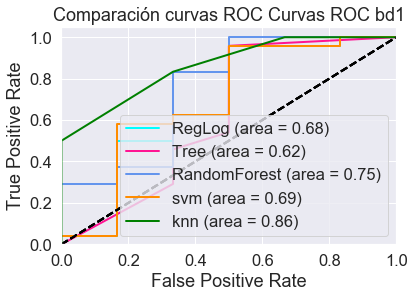

In [389]:
models = [lg_model_bd1, tree_model_bd1, rf_model_bd1, svm_model_bd1,knn_model_bd1]
colors = ['aqua', 'deeppink', 'cornflowerblue', 'darkorange','green']
labels=['RegLog', 'Tree','RandomForest', 'svm', 'knn']
title='Curvas ROC bd1'
ROC_graphics(models, colors, labels)

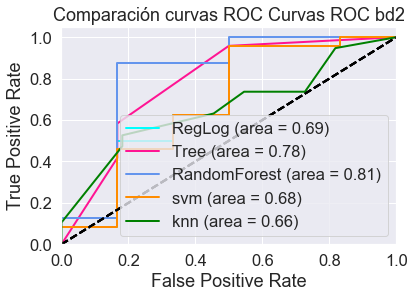

In [390]:
models = [lg_model_bd2, tree_model_bd2, rf_model_bd2, svm_model_bd2,knn_model_bd2]
colors = ['aqua', 'deeppink', 'cornflowerblue', 'darkorange','green']
labels=['RegLog', 'Tree','RandomForest', 'svm', 'knn']
title='Curvas ROC bd2'
ROC_graphics(models, colors, labels)

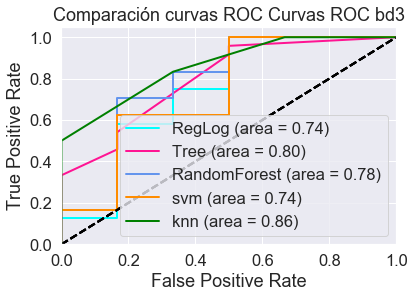

In [391]:
models = [lg_model_bd3, tree_model_bd3, rf_model_bd3, svm_model_bd3,knn_model_bd3]
colors = ['aqua', 'deeppink', 'cornflowerblue', 'darkorange','green']
labels=['RegLog', 'Tree','RandomForest', 'svm', 'knn']
title='Curvas ROC bd3'
ROC_graphics(models, colors, labels)

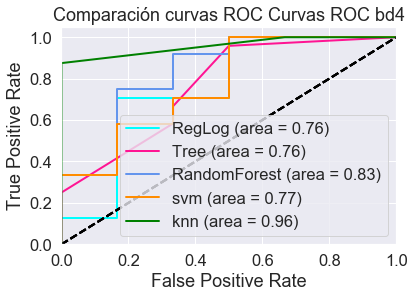

In [422]:
models = [lg_model_bd4, tree_model_bd4, rf_model_bd4, svm_model_bd4,knn_model_bd4]
colors = ['aqua', 'deeppink', 'cornflowerblue', 'darkorange','green']
labels=['RegLog', 'Tree','RandomForest', 'svm', 'knn']
title='Curvas ROC bd4'
ROC_graphics(models, colors, labels)